In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/FULL ALIGNED/qasa_aligned_iris_100.csv"
df = pd.read_csv(path)

In [4]:
df

,Unnamed: 0,question,context,correct_answer,iris_answer,Rouge1,Rouge2,RougeL,Bleu,Chrf,...,BEM,Bart,Prometheus,Faithfullness,Relevancy,Correctness,RSim,Consistency,TSim,LLM
0,0,How do these automated metrics for human prefe...,The ultimate aim of language technology is to ...,The automated metrics that are mentioned while...,"These automated metrics for human preferences,...",0.107527,0.018018,0.107527,2.073187,30.870571,...,0.081154,0.019156,3,0.750000,0.965836,0.474554,0.898315,1.000000,2.0,0.80
1,1,What does non-differentiable mean here? If the...,The ultimate aim of language technology is to ...,A formal definition of non-differentiability h...,Non-differentiable here refers to the fact tha...,0.346667,0.063158,0.306667,6.047905,46.334803,...,0.280730,0.050747,4,1.000000,0.871779,0.733083,0.932323,0.750000,4.0,0.95
2,2,Why is the action space of language modeling p...,Language generation action spaces are orders o...,The action space for language modeling is equa...,"No, the action space of language modeling is n...",0.300752,0.117647,0.270677,7.904009,37.513400,...,0.268187,0.051670,4,0.833333,0.930281,0.481069,0.924315,0.750000,2.0,0.70
3,3,What do the equations for Q-value and value re...,RL4LMs supports fine-tuning and training LMs f...,Q and V are mathematically expressed as: V_{t}...,The equations for Q-value and value represent ...,0.129032,0.016807,0.129032,5.469678,18.034209,...,0.088910,0.031399,4,NaN,1.000000,NaN,0.936193,0.750000,4.0,0.98
4,4,Why is it helpful to mask out less relevant to...,"Specifically, NLPOmaintains a masking policy \...",The authors hypothesize that their dynamic mas...,Masking out less relevant tokens helps the mod...,0.187500,0.000000,0.125000,0.784980,27.699611,...,0.261626,0.005237,3,1.000000,0.931911,0.509556,0.838288,1.000000,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Why did the authors use a mix of 1x1 and 3x3 f...,Strategy 2. Decrease the number of input chann...,Authors used a mix of 1x1 and 3x3 filters in t...,To maintain a small total number of parameters...,0.341880,0.282353,0.324786,20.804895,52.975511,...,0.705268,0.113443,4,1.000000,0.992714,0.669791,0.964885,1.000000,4.0,0.95
96,96,What is the total number of filters in squeeze...,We define the Fire module as follows.A Fire mo...,s1x1 is the number of filters in the squeeze l...,1,0.000000,0.000000,0.000000,0.000000,2.747253,...,0.082079,0.001708,1,0.000000,0.734565,0.567839,0.771567,0.166667,0.0,0.40
97,97,The Caffe framework does not natively support ...,\bulletSo that the output activations from 1x1...,The additional cost of using 2 convolutional l...,Increased computational cost due to concatenat...,0.140845,0.000000,0.140845,0.700323,31.773402,...,0.139731,0.028906,3,0.500000,0.779767,0.522473,0.889844,1.000000,2.0,NaN
98,98,Did the authors use AlexNet for evaluation of ...,We now turn our attention to evaluating Squeez...,"Yes, as told by authors that they used AlexNet...",Yes,0.000000,0.000000,0.000000,1.506189,7.672903,...,0.988326,0.010523,4,NaN,0.872393,0.696496,0.785894,0.000000,2.0,1.00


In [5]:
df.columns

Index(['Unnamed: 0', 'question', 'context', 'correct_answer', 'iris_answer',
       'Rouge1', 'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor',
       'Ter', 'Bert', 'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart',
       'Prometheus', 'Faithfullness', 'Relevancy', 'Correctness', 'RSim',
       'Consistency', 'TSim', 'LLM'],
      dtype='object')

In [6]:
columns_of_interest = ['Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullness', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]
pearson_correlation_matrix = selected_columns_df.corr()
spearman_correlation_matrix = selected_columns_df.corr(method='spearman')

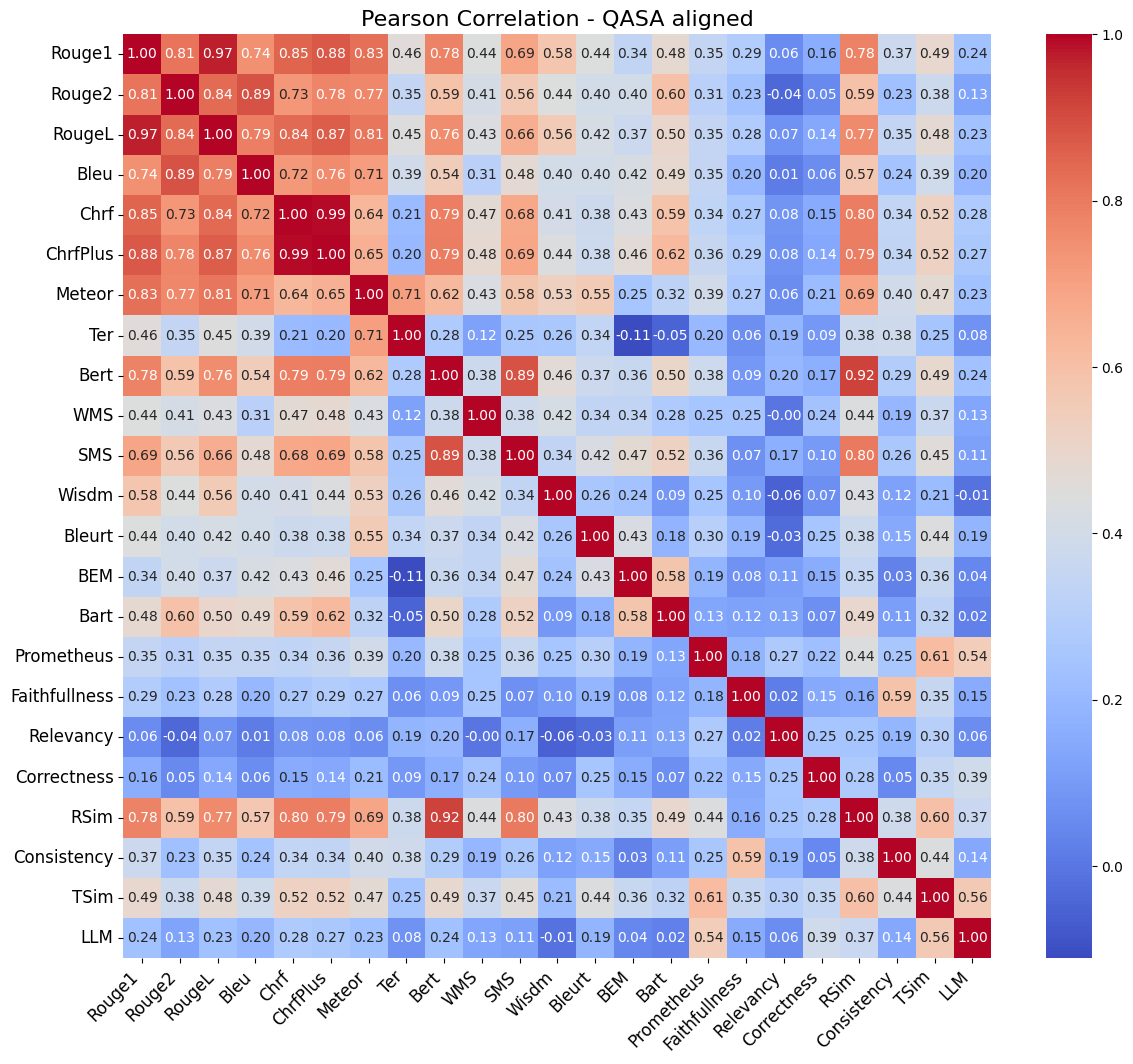

In [7]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Pearson Correlation - QASA aligned', fontsize=16)  # Adjust title size
plt.show()

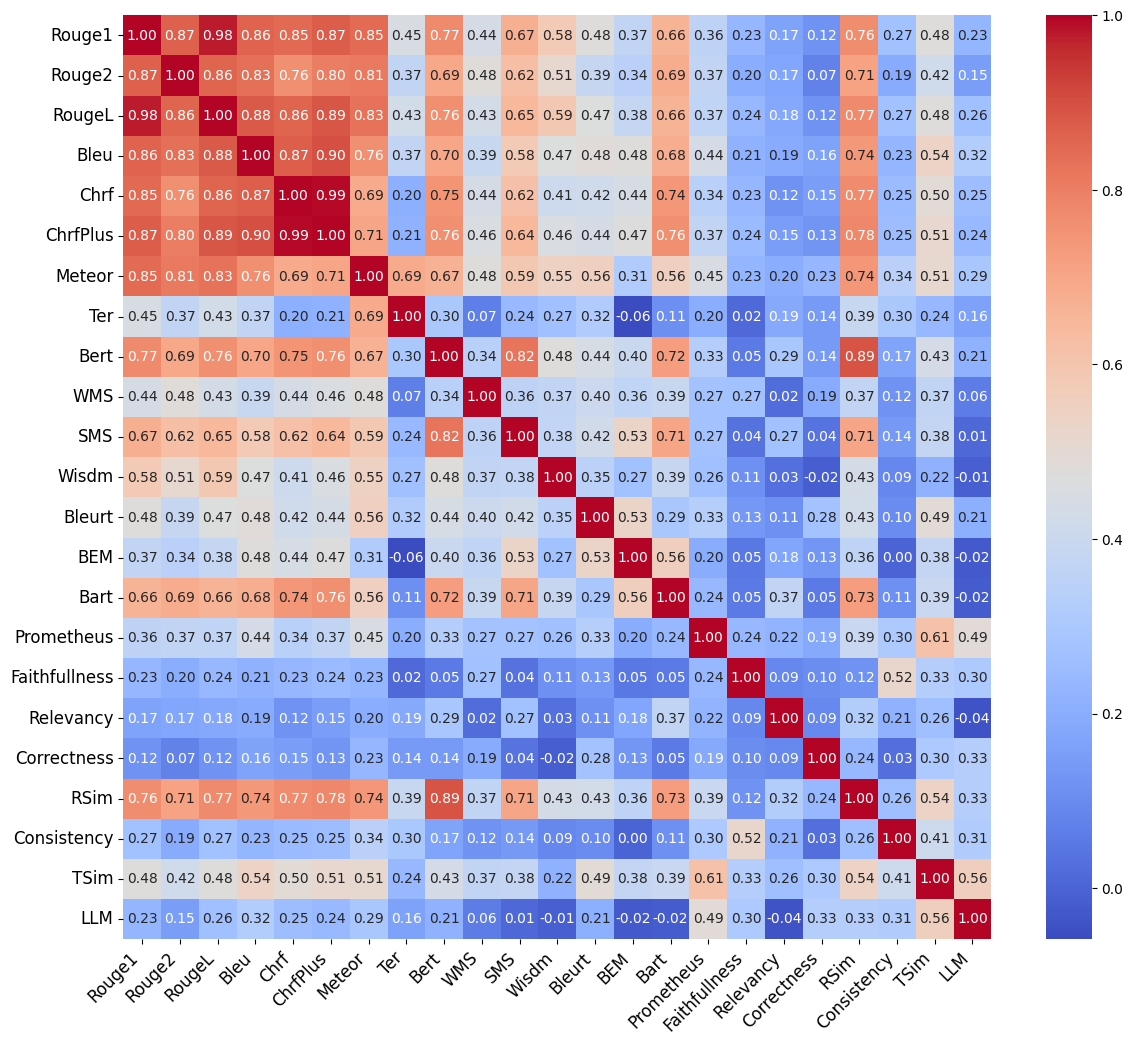

In [8]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=spearman_correlation_matrix.columns,
            yticklabels=spearman_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.show()

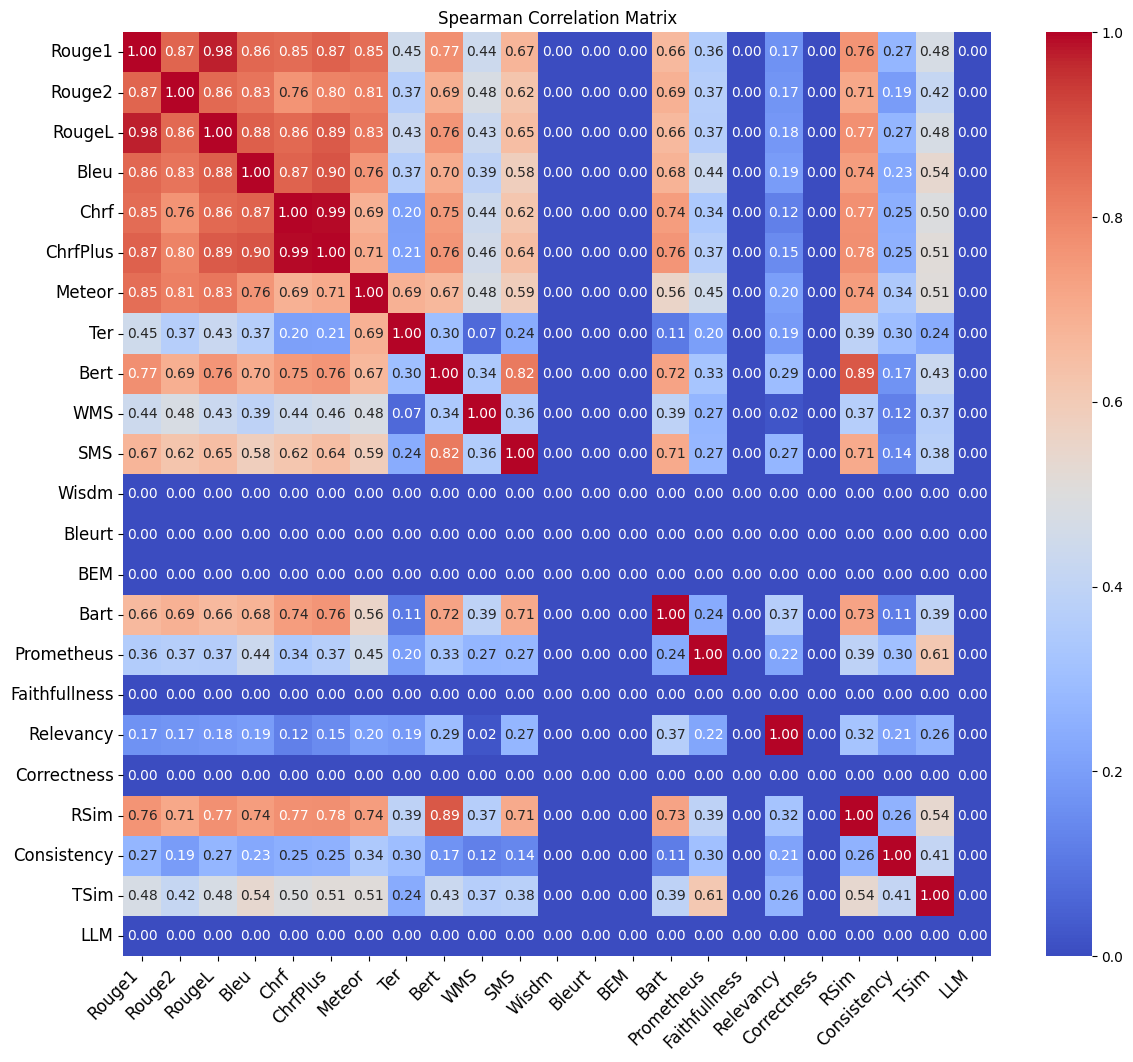

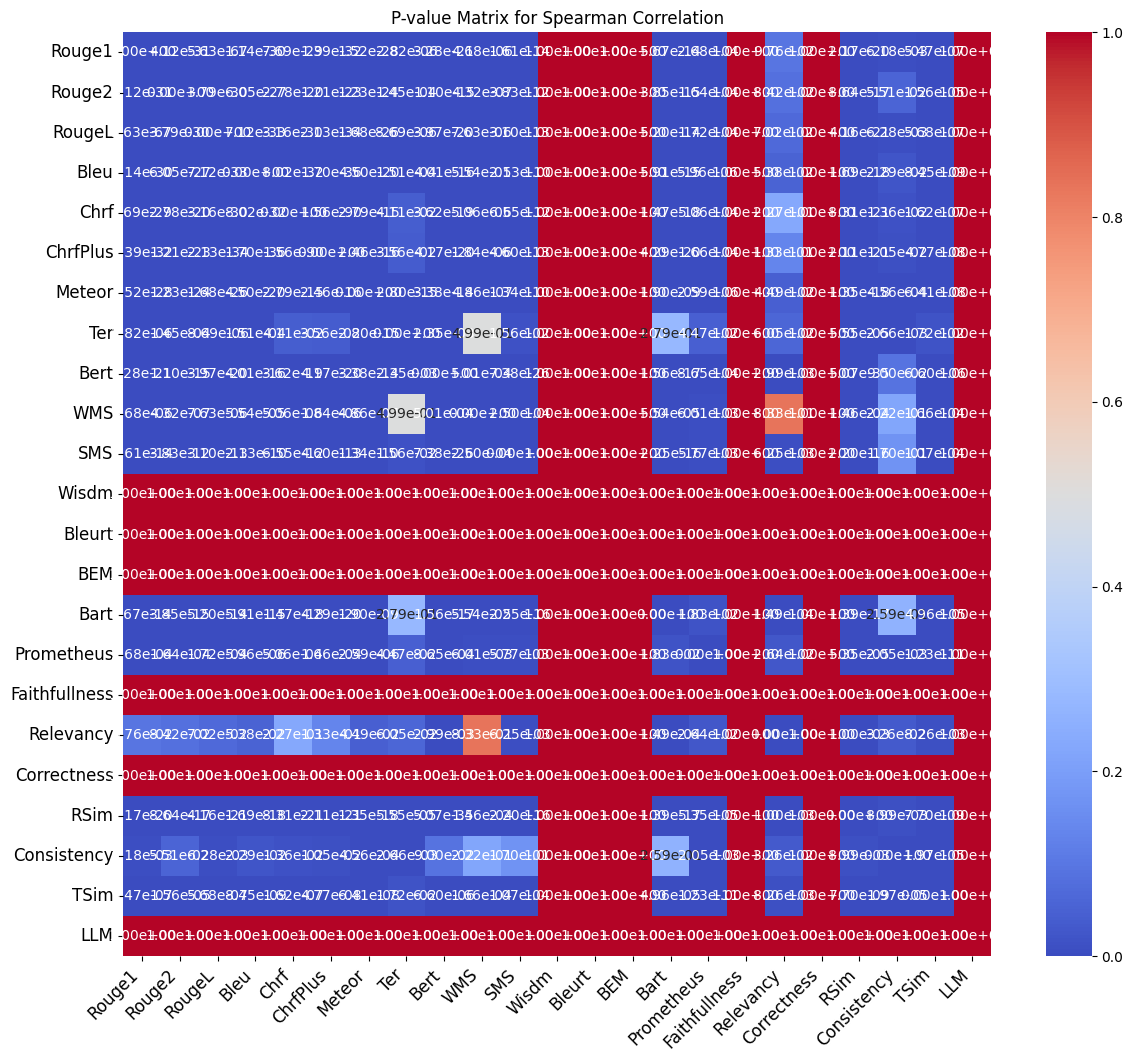

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Load your data
path = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/FULL ALIGNED/qasa_aligned_iris_100.csv"
df = pd.read_csv(path)

# Select the columns of interest
columns_of_interest = ['Rouge1', 'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'ChrfPlus', 
                       'Meteor', 'Ter', 'Bert', 'WMS', 'SMS', 'Wisdm', 'Bleurt', 
                       'BEM', 'Bart', 'Prometheus', 'Faithfullness', 'Relevancy', 
                       'Correctness', 'RSim', 'Consistency', 'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]

# Initialize matrices for Spearman correlations and p-values
spearman_correlation_matrix = np.zeros((len(columns_of_interest), len(columns_of_interest)))
p_value_matrix = np.zeros((len(columns_of_interest), len(columns_of_interest)))

# Compute Spearman correlation and p-values
for i, col1 in enumerate(columns_of_interest):
    for j, col2 in enumerate(columns_of_interest):
        corr, p_value = spearmanr(selected_columns_df[col1], selected_columns_df[col2])
        # Handle NaN values by replacing them with 0
        spearman_correlation_matrix[i, j] = corr if not np.isnan(corr) else 0
        p_value_matrix[i, j] = p_value if not np.isnan(p_value) else 1

# Convert matrices to DataFrame for easier handling
spearman_correlation_df = pd.DataFrame(spearman_correlation_matrix, columns=columns_of_interest, index=columns_of_interest)
p_value_df = pd.DataFrame(p_value_matrix, columns=columns_of_interest, index=columns_of_interest)

# Plot the heatmap for Spearman correlation
plt.figure(figsize=(14, 12))
sns.heatmap(spearman_correlation_df, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},
            xticklabels=spearman_correlation_df.columns,
            yticklabels=spearman_correlation_df.columns)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Spearman Correlation Matrix')
plt.show()

# Plot the heatmap for p-values
plt.figure(figsize=(14, 12))
sns.heatmap(p_value_df, annot=True, cmap='coolwarm', fmt=".2e",
            annot_kws={"size": 10},
            xticklabels=p_value_df.columns,
            yticklabels=p_value_df.columns)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('P-value Matrix for Spearman Correlation')
plt.show()
